In [1]:
%load_ext autoreload
%autoreload 2

from datetime import datetime, timedelta

import pytz
from pytz import timezone

from hundred_blocks_viz import hundred_blocks_viz
from pie_chart_viz import pie_chart_viz
from utils import load_google_sheet, load_dynamo_table, extract_blocks

from config import DYNAMODB_TABLE_NAME, ACTIVITY_COLORS

In [2]:
# lower bound on wakeup time (that way only get activities after sleep)
this_morning_naive = datetime.now().replace(
    hour=9, minute=0, second=0, microsecond=0
)
# convert to an "aware" datetime object (has a sense of timezone)
eastern = timezone('US/Eastern')
this_morning_aware = eastern.localize(this_morning_naive)
print(this_morning_aware)
last_morning_aware = this_morning_aware - timedelta(days=1)
print(last_morning_aware)

2020-10-05 09:00:00-04:00
2020-10-04 09:00:00-04:00


Earliest for 10/05/20: 2020-10-05 09:16:19.983000-04:00
Latest for 10/05/20: 2020-10-06 00:16:58.569000-04:00
# of blocks for 10/05/20: 91



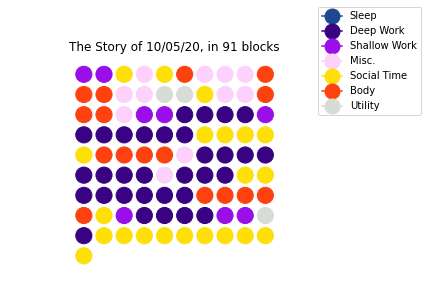

In [18]:
start_dt = this_morning_aware
end_dt = this_morning_aware + timedelta(days=1)
df = load_dynamo_table(DYNAMODB_TABLE_NAME,
                       start_dt=start_dt,
                       end_dt=end_dt)
dstring = start_dt.strftime('%m/%d/%y')
earliest = df['timestamp'].min().astimezone(eastern)
print(f'Earliest for {dstring}: {earliest}')
latest = df['timestamp'].max().astimezone(eastern)
print(f'Latest for {dstring}: {latest}')
blocks = extract_blocks(df)
print(f'# of blocks for {dstring}: {len(blocks)}')
print()
hundred_blocks_viz(blocks, ACTIVITY_COLORS, day=start_dt)

Earliest for 09/29/20: 09:31:32
Latest for 09/29/20: 01:19:17
# of blocks for 09/29/20: 95

Earliest for 09/30/20: 09:26:08
Latest for 09/30/20: 00:53:45
# of blocks for 09/30/20: 93

Earliest for 10/01/20: 10:33:01
Latest for 10/01/20: 00:47:42
# of blocks for 10/01/20: 86

Earliest for 10/02/20: 09:45:40
Latest for 10/02/20: 18:20:42
# of blocks for 10/02/20: 52

Earliest for 10/03/20: 10:42:41
Latest for 10/03/20: 21:35:09
# of blocks for 10/03/20: 66

Earliest for 10/04/20: 11:59:03
Latest for 10/04/20: 01:29:10
# of blocks for 10/04/20: 82

Earliest for 10/05/20: 09:16:19
Latest for 10/05/20: 19:26:57
# of blocks for 10/05/20: 62



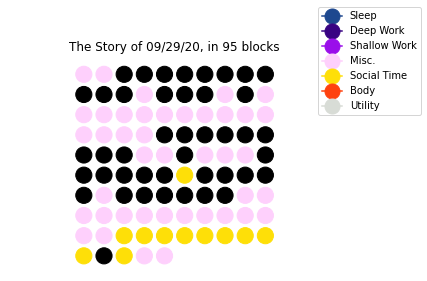

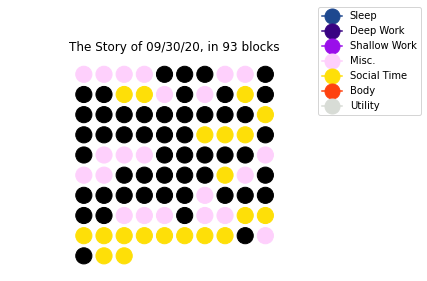

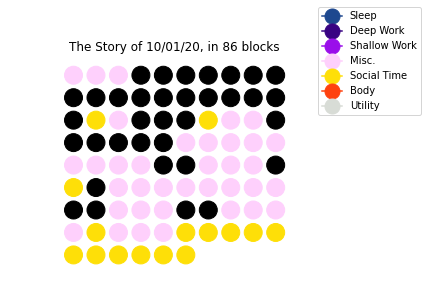

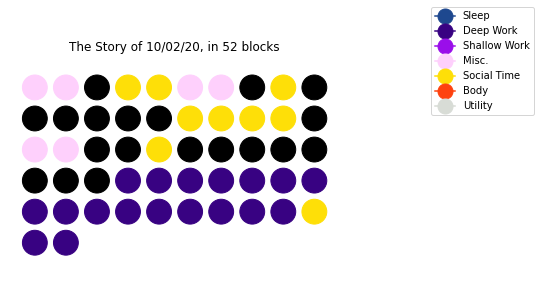

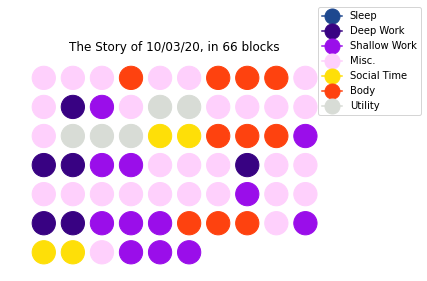

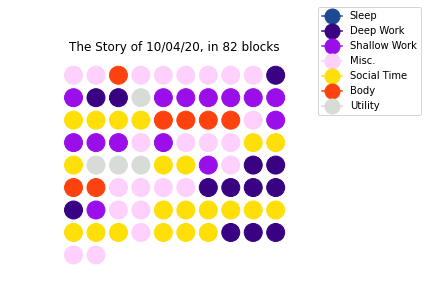

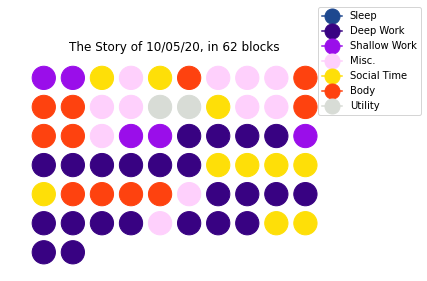

In [17]:
# Weekly review for the past 7 days
# earlier days have black dots because I changed the categorization 
# since then, and haven't added colors for the old ones 😅.

for i in range(-6, 1):
    start_dt = this_morning_aware + timedelta(days=i)
    end_dt = this_morning_aware + timedelta(days=i+1)
    df = load_dynamo_table(DYNAMODB_TABLE_NAME,
                           start_dt=start_dt,
                           end_dt=end_dt)
    dstring = start_dt.strftime('%x')
    earliest = df['timestamp'].min().astimezone(eastern).strftime('%X')
    print(f'Earliest for {dstring}: {earliest}')
    # Might be the next day, strictly speaking
    latest = df['timestamp'].max().astimezone(eastern).strftime('%X')
    print(f'Latest for {dstring}: {latest}')
    blocks = extract_blocks(df)
    print(f'# of blocks for {dstring}: {len(blocks)}')
    print()
    hundred_blocks_viz(blocks, ACTIVITY_COLORS, day=start_dt)

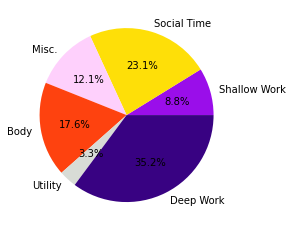

In [21]:
# Pie chart of times spent
df = load_dynamo_table(DYNAMODB_TABLE_NAME, 
                       start_dt=this_morning_aware)
blocks = extract_blocks(df)
pie_chart_viz(blocks, ACTIVITY_COLORS)

In [19]:
# Approx. minutes spent on each activity
import numpy as np
df = load_dynamo_table(DYNAMODB_TABLE_NAME, 
                       start_dt=this_morning_aware)
blocks = extract_blocks(df)
blocks = np.array(blocks)
for activity in ACTIVITY_COLORS:
    activity_time = (blocks == activity).sum() * 10
    print(f'{activity} Time: ~{activity_time} minutes')

Sleep Time: ~0 minutes
Deep Work Time: ~320 minutes
Shallow Work Time: ~80 minutes
Misc. Time: ~110 minutes
Social Time Time: ~210 minutes
Body Time: ~160 minutes
Utility Time: ~30 minutes
